In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

# Funciones de Soporte (Helpers)

In [125]:
def encode_column(cell):
    # Crear un DataFrame de ejemplo
    # data = {
    #     'Lenguaje': ['Python', 'JavaScript', 'Python', 'Java', 'C', 'JavaScript', 'Python']
    # }

    # df = pd.DataFrame(cell)
    df = cell.to_frame()
    jobs_encoder = OneHotEncoder(sparse_output=False, drop='first')
    jobs_encoder.fit(df)
    df_final = jobs_encoder.transform(df)

    encoded_df = pd.DataFrame(df_final, columns=jobs_encoder.get_feature_names_out())
    return encoded_df

# Trabajo Final

## Hipótesis

- Pregunta #1: Que salario o rango debería asignarle basado en cantidad de años y tecnologia?
- Hipotesis #1:

In [126]:
# tomamos el DataSet y hacemos un poco de limpieza
#   -> Renombrar columnas para mejorar su legibilidad
#   -> Removemos algunas columnas que no son necesarios

df_salary = pd.read_csv('./datasets/encuesta-salarial-2024.csv', skiprows=0,
                        thousands=".",
                        decimal=",",)
df_salary.rename(columns={'Unnamed: 0': 'indice', '_sal': 'salario', \
    'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual': 'lenguajes'}, inplace=True)
df_salary.drop(columns={'indice'}, inplace=True)
df_salary.head()

,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,salir_o_seguir_contestando_sobre_estudios,tengo_edad,genero,sueldo_dolarizado,seniority,salario
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1700000,1500000.0,Cobro parte del salario en dólares,1000,No,No recibo bono,Dos,...,Terminar encuesta,NaN,NaN,NaN,NaN,31,Hombre Cis,True,Semi-Senior,1700000
1,Buenos Aires,Full-Time,Staff (planta permanente),2000000,1900000.0,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Performance individual,Tres,...,Responder sobre guardias,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,28,Hombre Cis,True,Semi-Senior,2000000
2,Córdoba,Full-Time,Contractor,1000000,1000000.0,Cobro todo el salario en dólares,1500,No,No recibo bono,No,...,Responder sobre guardias,No,0.0,Neto,Terminar encuesta,27,Hombre Cis,True,Semi-Senior,1000000
3,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),850000,2700000.0,Cobro parte del salario en dólares,1010,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,NaN,31,Hombre Cis,True,Senior,850000
4,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,3300000,3000000.0,Cobro todo el salario en dólares,1000,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,NaN,34,Hombre Cis,True,Semi-Senior,3300000


In [127]:

# Tomamos valores unicos para ver si podemos convertirlos a categoria
# lenguajes = df_salary['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].unique()

# seniors_category_serie = df_salary['seniority'].unique()
# seniors_category_serie = df_salary['anos_de_experiencia'].unique()
# seniors_category_serie = df_salary['carrera'].unique()
# seniors_category_serie = df_salary['tipo_de_contrato'].unique()

df_salary.dropna(subset=['trabajo_de', 'lenguajes'], inplace=True)

profession_filter = ['Developer', 'Technical Leader', 'Data Engineer', 'Automatizador', \
    'Consultant', 'Data Scientist', 'Architect', 'Engineer', 'Machine Learning Engineer', \
        'Analista Senior en Informatica', 'AI Engineer', 'Operaciones', \
            'Hago desde el análisis y la programación. Diseño de DB, etc', 'Analista Tecnico Funcional', \
                'Ingenieria Electronica', 'Técnico en informática']

df_salary_filtered_by_profession = df_salary.where(df_salary['trabajo_de'].isin(profession_filter))
df_salary_filtered_by_profession.dropna(subset=['lenguajes'], inplace=True)

# encoded_df = pd.DataFrame(df_final, columns=jobs_encoder.get_feature_names_out(['lenguajes']))
# print(encoded_df.head())


# # Ordenamos la columna Lenguajes de Programación
# df_salary_filtered_by_profession['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'] = df_salary_filtered_by_profession['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].apply(sort_cell_contents)

# # Crear columnas nuevas por cada lenguaje
# df_test = df_salary_filtered_by_profession['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].str.split(',', expand=True)
# df_test.head()

# df_salary_filtered_by_profession['JavaScript']
# df_salary_filtered_by_profession['Java']
# df_salary_filtered_by_profession['TypeScript']
# df_salary_filtered_by_profession['C#']
# df_salary_filtered_by_profession['PHP']
# df_salary_filtered_by_profession['Python']
# df_salary_filtered_by_profession['SQL']
# df_salary_filtered_by_profession['R']
# df_salary_filtered_by_profession['CSS']
# df_salary_filtered_by_profession['HTML']
# df_salary_filtered_by_profession['.NET']


# val = df_salary_filtered_by_profession['trabajo_de'].unique()
# val

# df_cprogrammers = df_salary_filtered_by_profession.where(df_salary['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].str.contains('C#'))


# df_senior_programmers = df_cprogrammers.query("seniority == 'Senior'")
# df_senior_programmers


In [128]:
# Spliteamos los lenguajes de programación en un array dentro de la columna nueva lenguajes_array
df_salary_filtered_by_profession['lenguajes_array'] = df_salary_filtered_by_profession['lenguajes'] \
    .apply(func=(lambda x: str(x).split(', ')))

print(df_salary_filtered_by_profession['lenguajes_array'])

0                     [HTML, Javascript, PHP, TypeScript]
1                                [Javascript, TypeScript]
2                             [C#, Python, R, Scala, SQL]
3                [CSS, HTML, Javascript, SQL, TypeScript]
4                          [.NET, Javascript, TypeScript]
                              ...                        
5478                          [Bash/Shell, Python, Scala]
5480    [Bash/Shell, CSS, HTML, Java, Javascript, Scal...
5481                  [CSS, HTML, Javascript, TypeScript]
5484                                                [SQL]
5488                   [HTML, Javascript, PHP, Rust, SQL]
Name: lenguajes_array, Length: 2958, dtype: object


In [129]:
# Leer el archivo CSV
df = pd.DataFrame(df_salary_filtered_by_profession['lenguajes_array'])

# Convertir la columna de listas de lenguajes en una lista de listas
# df['lenguajes_array'] = df['lenguajes_array'].apply(lambda x: eval(x))  # Convertir el string a lista

# Expandir la lista de lenguajes en filas individuales
df_expanded = df.explode('lenguajes_array')

print(df_expanded)

     lenguajes_array
0               HTML
0         Javascript
0                PHP
0         TypeScript
1         Javascript
...              ...
5488            HTML
5488      Javascript
5488             PHP
5488            Rust
5488             SQL

[10478 rows x 1 columns]


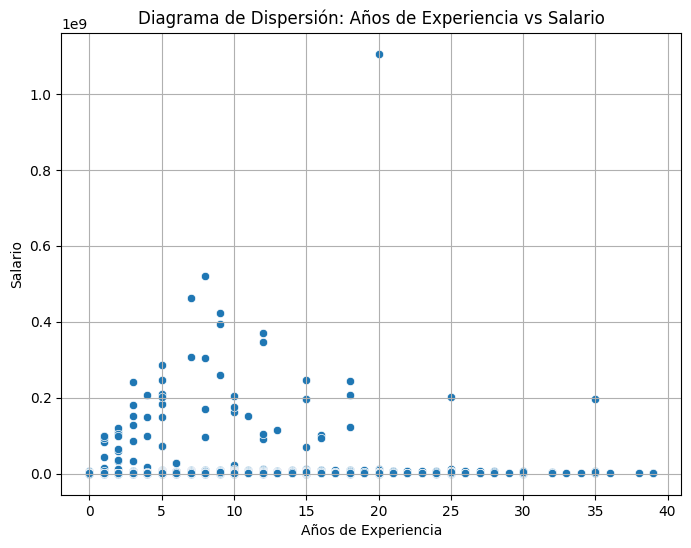

In [130]:
# Crear un diagrama de dispersión
plt.figure(figsize=(8, 6))
# sns.scatterplot(x='years_experience', y='wage', data=df)
sns.scatterplot(x='anos_de_experiencia', y='salario', data=df_salary_filtered_by_profession)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión: Años de Experiencia vs Salario')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Qué vemos?
- Los sueldos mas altos están entre los 5 y los 10 años de experiencia. ¿Por qué será?
  - Será por el lenguaje de programación?
  - Quizás por la región donde vive?

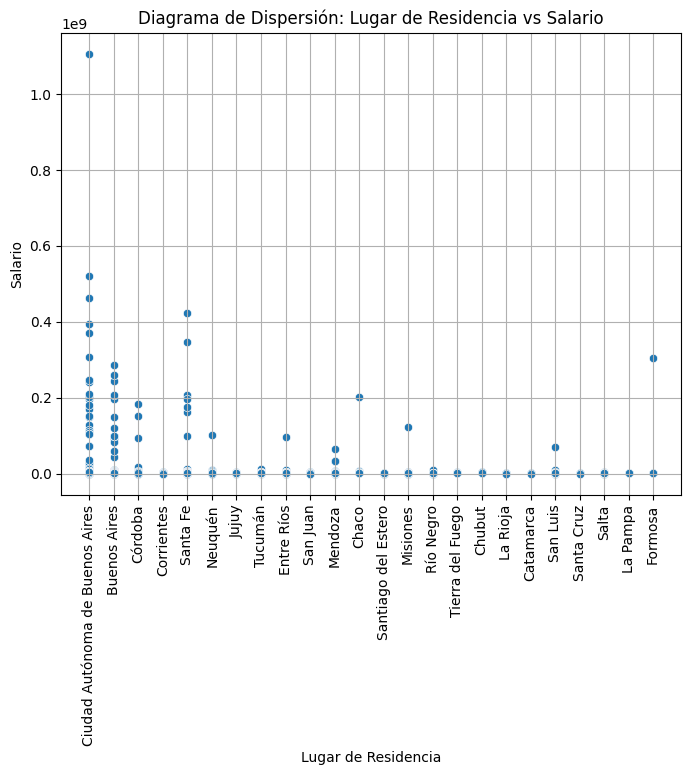

In [134]:
# Crear un diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='donde_estas_trabajando', y='salario', data=df_salary_filtered_by_profession)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión: Lugar de Residencia vs Salario')
plt.xlabel('Lugar de Residencia')
plt.xticks(rotation=90)
plt.ylabel('Salario')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Qué vemos?
- Logicamente en Bs As, CABA, Córdoba y Santa Fe están concentrados los developers con sueldos mas altos, esto entendemos que es porque:
  - Las ciudades mas grandes albergan mayor población
  - Las universidades entrarían en juego?

Recomendar un salario de acuerdo al Seniority, Tecnologia, Habla inglés, años de experiencia, Region, Contractor ?

EDA
- 
- Ver como afecta la región
- Regresión lineal en principio y ahí ver


In [112]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Crear un DataFrame de ejemplo
data = {
    'Lenguaje': ['Python', 'JavaScript', 'Python', 'Java', 'C', 'JavaScript', 'Python']
}

df = pd.DataFrame(data)
print("DataFrame original:")
print(df)

jobs_encoder = OneHotEncoder(sparse_output=False, drop='first')
jobs_encoder.fit(df['Lenguaje'].to_frame())
df_final = jobs_encoder.transform(df['Lenguaje'].to_frame())
print("DataFrame result:")
# print(df_final)

# print(jobs_encoder.get_feature_names_out())
encoded_df = pd.DataFrame(df_final, columns=jobs_encoder.get_feature_names_out(['Lenguaje']))
print(encoded_df)
# # Crear el objeto OneHotEncoder (sin el argumento `sparse`)
# encoder = OneHotEncoder()
# print("Encoder")
# print(encoder)

# # Ajustar y transformar la columna 'Lenguaje'
# encoded_array = encoder.fit_transform(df[['Lenguaje']])

# print("Encoder_array")
# print(encoded_array)

# print("Columnas")
# print(encoder.get_feature_names_out())

# # # Crear un DataFrame con los datos codificados
# # encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Lenguaje']))

# # # Mostrar el DataFrame original y el DataFrame codificado
# # print("\nDataFrame codificado:")
# # print(encoded_df)


DataFrame original:
     Lenguaje
0      Python
1  JavaScript
2      Python
3        Java
4           C
5  JavaScript
6      Python
DataFrame result:
   Lenguaje_Java  Lenguaje_JavaScript  Lenguaje_Python
0            0.0                  0.0              1.0
1            0.0                  1.0              0.0
2            0.0                  0.0              1.0
3            1.0                  0.0              0.0
4            0.0                  0.0              0.0
5            0.0                  1.0              0.0
6            0.0                  0.0              1.0
